In [1]:
import os
import math
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

import torch
from torch import tensor, nn, optim
import torch.nn.functional as F

import matplotlib.colors as colors
plt.rcdefaults()
color_arr = colors.ListedColormap(['#F69C34', '#1F82C0'], 'indexed')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

#torch.__all__, torch.__version__

In [2]:
from sklearn.datasets import make_circles
x_1, y_1 = make_circles()
x_1

array([[ 1.49905052e-01,  7.85829801e-01],
       [ 7.28968627e-01, -6.84547106e-01],
       [-7.28968627e-01,  6.84547106e-01],
       [-6.47213595e-01, -4.70228202e-01],
       [ 4.28661436e-01,  6.75462340e-01],
       [-8.09016994e-01, -5.87785252e-01],
       [ 7.43821189e-01, -2.94499642e-01],
       [-7.93691761e-01,  1.00266587e-01],
       [ 6.37423990e-01,  7.70513243e-01],
       [ 3.40623433e-01,  7.23861642e-01],
       [ 3.09016994e-01,  9.51056516e-01],
       [-7.01045344e-01,  3.85402939e-01],
       [-7.74866529e-01, -1.98951910e-01],
       [-2.47213595e-01,  7.60845213e-01],
       [-4.25779292e-01,  9.04827052e-01],
       [-9.68583161e-01, -2.48689887e-01],
       [-8.76306680e-01, -4.81753674e-01],
       [-5.83174902e-01,  5.47637685e-01],
       [-6.27905195e-02, -9.98026728e-01],
       [-2.47213595e-01, -7.60845213e-01],
       [-8.00000000e-01, -2.57299624e-16],
       [-5.35826795e-01,  8.44327926e-01],
       [ 8.76306680e-01, -4.81753674e-01],
       [ 1.

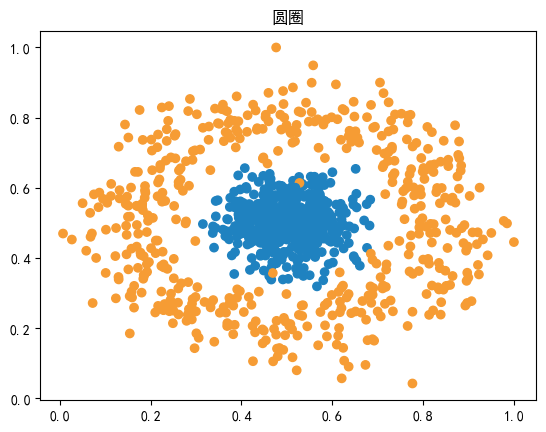

In [62]:
x_1, y_1 = make_circles(n_samples=1000, noise=0.2, factor=0)
x_1 = (1 + x_1 / x_1.max(axis=0)) / 2
plt.title("圆圈")
plt.scatter(x_1[:, 0], x_1[:, 1], c=y_1, cmap=color_arr)
plt.show()

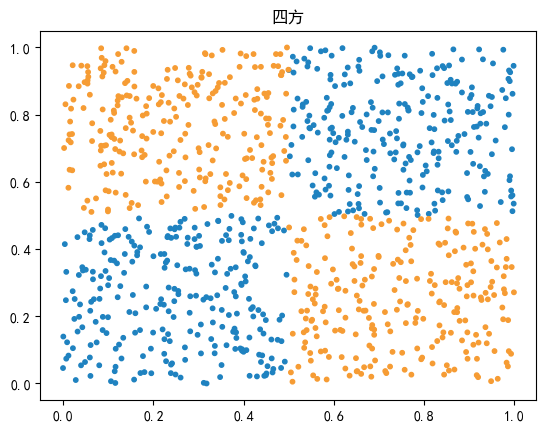

In [29]:
x_2 = 2 * np.random.rand(1000, 2) - 1
y_2 = x_2[:, 0] * x_2[:, 1] / abs(x_2[:, 0] * x_2[:, 1])
y_2 = (y_2 + abs(y_2)) / 2
x_2 = (1 + x_2 / x_2.max(axis=0)) / 2

plt.title('四方')
plt.scatter(x_2[:, 0], x_2[:, 1], c=y_2, s=10, cmap=color_arr)
plt.show()

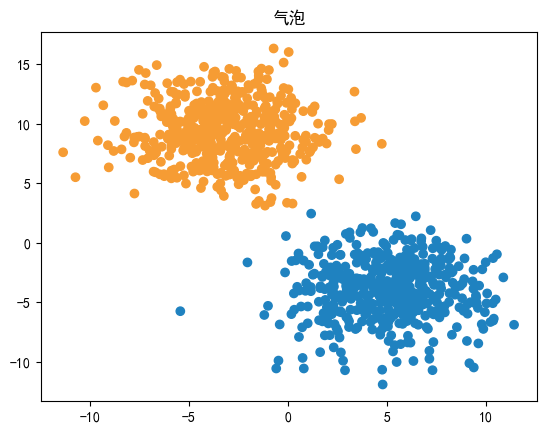

In [36]:
from sklearn.datasets import make_blobs
x_3, y_3 = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=2.5)
plt.title("气泡")
plt.scatter(x_3[:, 0], x_3[:, 1], c=y_3, cmap=color_arr)
plt.show()

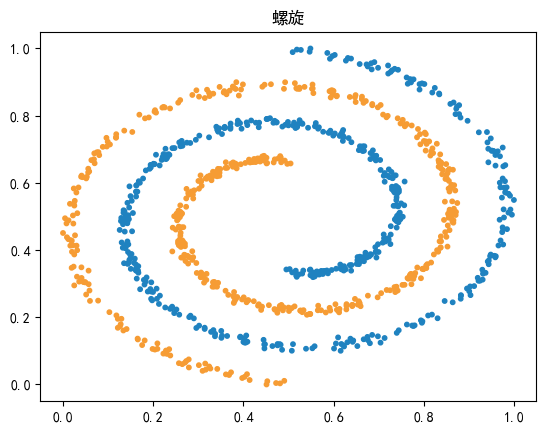

In [42]:
from sklearn.datasets import make_swiss_roll

x_4, y_4 = make_swiss_roll(n_samples=500,
                                     noise=0.2,
                                     random_state=2)

x_4 = np.array([x_4[:,0],x_4[:,2], y_4]).T
x_4[:,2] = 1

x_4 = np.row_stack((x_4, -x_4))

y_4 = x_4[:,2]
y_4 = (y_4+abs(y_4))/2

x_4 = x_4[:,:2]

x_4 = (x_4 - x_4.min(axis=0)) / (x_4.max(axis=0) - x_4.min(axis=0))

plt.title('螺旋')
plt.scatter(x_4[:, 0], x_4[:, 1], c=y_4, s=10, cmap=color_arr)
plt.show()

In [60]:
def fill_7col(data_x):
    data_x_pd = pd.DataFrame(data_x, columns=['x1','x2'])
    data_x_pd['x1^2'] = data_x_pd['x1'] * data_x_pd['x1']
    data_x_pd['x2^2'] = data_x_pd['x2'] * data_x_pd['x2']
    data_x_pd['x1x2'] = data_x_pd['x1'] * data_x_pd['x2']
    data_x_pd['sin(x1)'] = data_x_pd['x1'].apply(lambda x: math.sin(x))
    data_x_pd['sin(x2)'] = data_x_pd['x2'].apply(lambda x: math.sin(x))
    return tensor(data_x_pd.values, dtype=torch.float)
disp_scale = 100.0
disp_input = []
for a in range(int(disp_scale)+1):
    for b in range(int(disp_scale)+1):
        disp_input.append([a/disp_scale, b/disp_scale])
disp_input_np = np.array(disp_input)
disp_input_tensor = fill_7col(disp_input_np)
x_1_2 = fill_7col(x_1)
x_1_2.shape

torch.Size([1000, 7])

In [54]:
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.l1 = nn.Linear(7,4)
        self.l2 = nn.Linear(4,4)
        self.l3 = nn.Linear(4,4)
        self.l4 = nn.Linear(4,2)

    def forward(self, x):
        y = F.relu(self.l1(x))
        y = F.relu(self.l2(y))
        y = F.relu(self.l3(y))
        y = F.relu(self.l4(y))
        return F.softmax(y, dim=1)
model = Model1()
model(x_1_2)

tensor([[0.5164, 0.4836],
        [0.5151, 0.4849],
        [0.5170, 0.4830],
        ...,
        [0.5149, 0.4851],
        [0.5154, 0.4846],
        [0.5150, 0.4850]], grad_fn=<SoftmaxBackward0>)

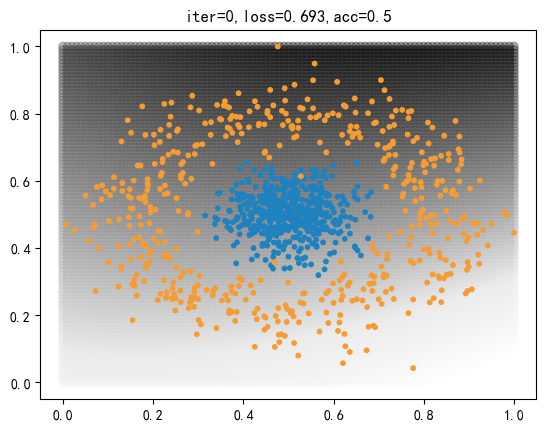

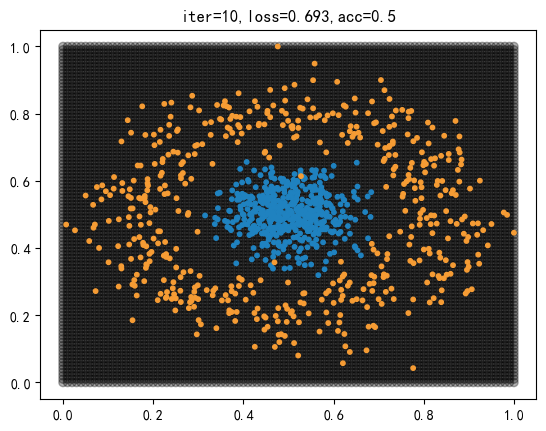

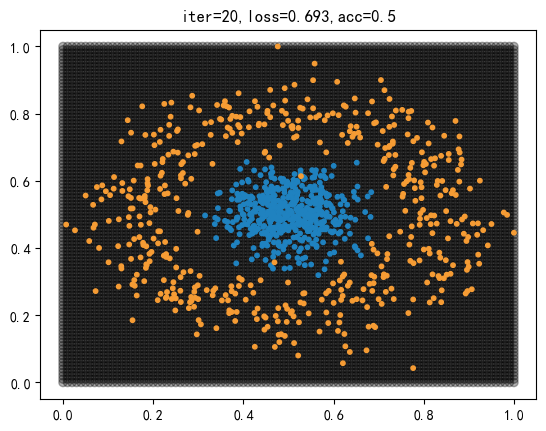

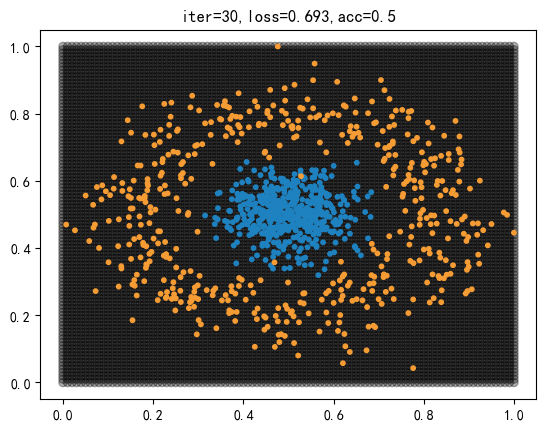

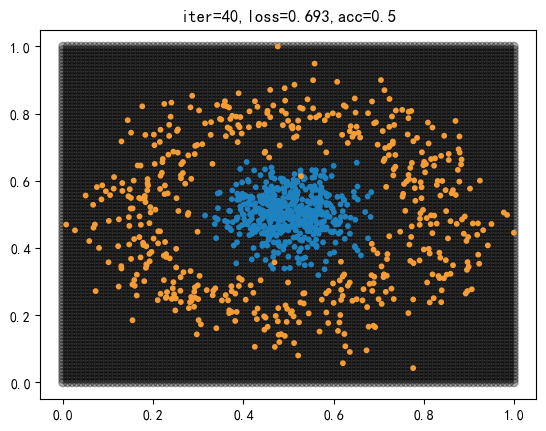

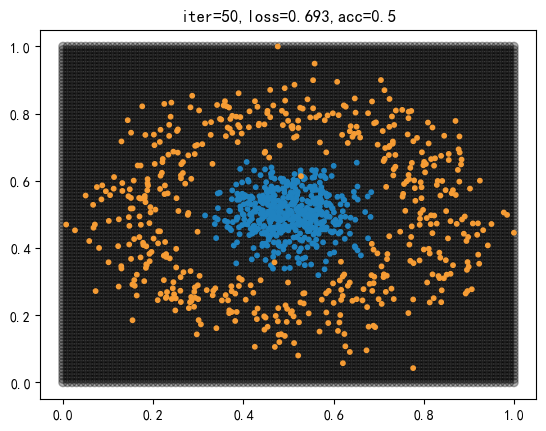

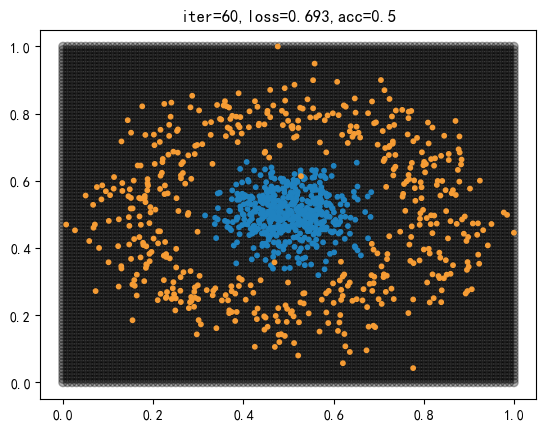

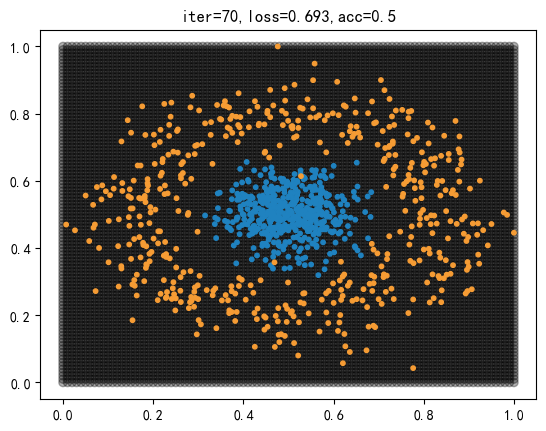

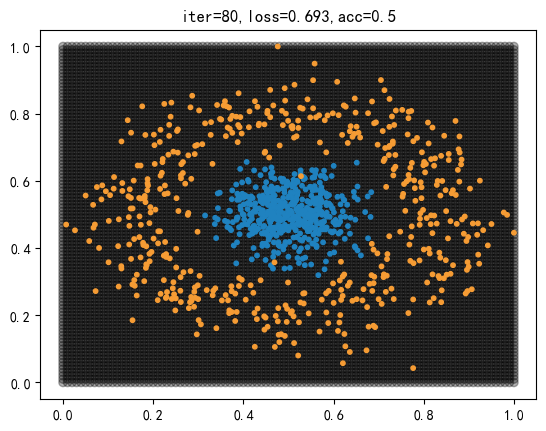

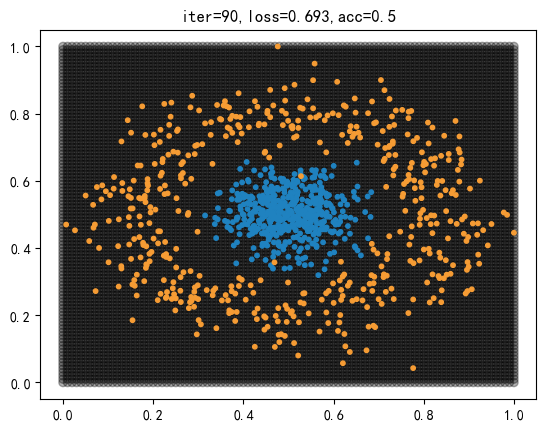

In [65]:
x_train = fill_7col(x_1)
y_train = tensor(y_1)

from sklearn.metrics import accuracy_score

class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.l1 = nn.Linear(7,4)
        self.l2 = nn.Linear(4,4)
        self.l3 = nn.Linear(4,4)
        self.l4 = nn.Linear(4,2)

    def forward(self, x):
        y = F.relu(self.l1(x))
        y = F.relu(self.l2(y))
        y = F.relu(self.l3(y))
        y = F.relu(self.l4(y))
        return F.softmax(y, dim=1)

model = Model1()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

iter_arr = []

for iter in range(100):
    train_x_predict = model(x_train)
    loss_train = criterion(train_x_predict, y_train.view(-1))
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()
    if iter % 10 ==0:
        acc_score = accuracy_score(y_train.cpu().detach().numpy(), train_x_predict.argmax(1).cpu().detach().numpy())
        print_len = [iter,
                     loss_train.cpu().detach().numpy(),
                     acc_score]
        iter_arr.append(print_len)
    # if iter % 1000 == 0:
    #     print("iter=" + str(print_len[0])
    #           + ",loss=" + str(print_len[1])[:5]
    #           + ",acc=" + str(print_len[2])[:5])
        model.eval()
        disp_predict_tensor = model(disp_input_tensor)
        model.train()
        disp_predict_np = disp_predict_tensor.cpu().detach().numpy()
        plt.title("iter=" + str(print_len[0])
                  + ",loss=" + str(print_len[1])[:5]
                  + ",acc=" + str(print_len[2])[:5])
        plt.scatter(disp_input_np[:,0], disp_input_np[:,1], c=disp_predict_np[:,0]-disp_predict_np[:,1], cmap='gray', alpha=0.3)
        plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=10, cmap=color_arr)
        plt.show()

